# Acerca Del Conjunto De Datos

## Descripción:

El Informe Mundial sobre la Felicidad es un estudio de referencia sobre el estado de la felicidad mundial. El primer informe se publicó en 2012, el segundo en 2013, el tercero en 2015 y el cuarto en la Actualización de 2016. El Informe Mundial sobre la Felicidad 2017, que clasifica a 155 países según sus niveles de felicidad, se presentó en las Naciones Unidas en un evento que celebraba el Día Internacional de la Felicidad el 20 de marzo. El informe sigue ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más indicadores de felicidad para fundamentar sus decisiones de formulación de políticas. Los principales expertos en todos los campos (economía, psicología, análisis de encuestas, estadísticas nacionales, salud, políticas públicas y más) describen cómo se pueden utilizar eficazmente las mediciones del bienestar para evaluar el progreso de las naciones. Los informes analizan el estado de la felicidad en el mundo actual y muestran cómo la nueva ciencia de la felicidad explica las variaciones personales y nacionales en la felicidad.

## ¿Por Qué Es Interesante Este Conjunto De Datos?

¿Qué países o regiones ocupan los primeros puestos en cuanto a felicidad general y en cada uno de los seis factores que contribuyen a la felicidad? ¿Cómo cambiaron las clasificaciones o las puntuaciones de los países entre los informes de 2015 y 2016, así como entre los de 2016 y 2017? ¿Algún país experimentó un aumento o una disminución significativos de la felicidad?

¿Qué es la distopía?

La distopía es un país imaginario que tiene a la gente menos feliz del mundo. El propósito de establecer la distopía es tener un punto de referencia con el que se puedan comparar favorablemente todos los países (ningún país tiene un desempeño peor que el de la distopía) en términos de cada una de las seis variables clave, lo que permite que cada subbarra tenga un ancho positivo. Por lo tanto, las puntuaciones más bajas observadas para las seis variables clave caracterizan la distopía. Dado que la vida sería muy desagradable en un país con los ingresos más bajos del mundo, la menor esperanza de vida, la menor generosidad, la mayor corrupción, la menor libertad y el menor apoyo social, se lo conoce como "distopía", en contraste con la utopía.

¿Qué son los residuos?

Los residuos, o componentes no explicados, difieren para cada país, lo que refleja el grado en que las seis variables sobreexplican o subexplican las evaluaciones de vida promedio de 2014-2016. Estos residuos tienen un valor promedio de aproximadamente cero en todo el conjunto de países. La Figura 2.2 muestra el residuo promedio para cada país cuando se aplica la ecuación de la Tabla 2.1 a los datos promedio de 2014-2016 para las seis variables en ese país. Combinamos estos residuos con la estimación de las evaluaciones de vida en Dystopia de modo que la barra combinada siempre tenga valores positivos. Como se puede ver en la Figura 2.2, aunque algunos residuos de evaluación de vida son bastante grandes, en ocasiones superan un punto en la escala de 0 a 10, siempre son mucho más pequeños que el valor calculado en Dystopia, donde la vida promedio se califica en 1,85 en la escala de 0 a 10.

## Algunas De Las Preguntas De Ejemplo Que Se Pueden Responder Usando Esto:

- Cuales son los paises mas felices de acuerdo a estos indices.
- Visualizar los paises en cuanto a su distancia de distopia

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Agregar la carpeta 'src' al sys.path
import sys
import os
df = pd.DataFrame()
sys.path.append(os.path.abspath("../src"))

# Ahora puedes importar utils
from utils import cargar_datos_pd
from utils import ver_resumen_nulos
from utils import limpiar_letras_de_numeros
from utils import obtener_filas_no_numericas
from utils import identificar_atipicos_IQR
from utils import ver_diccionario
from utils import imprimir_bigotes
from utils import comparar_cadenas

ruta_archivo = "../data/dataset3.csv"
columna = 'nombre_columna'
titulo = 'titulo'
diccionario = f'Diccionario de Datos de {ruta_archivo}'
columnas_diccionario = [
        "Country: Name of the country.",
        "app_version: Versión de la aplicación usada.",
        "platform: Plataforma del dispositivo (Android, iOS).",
        "session_duration: Duración de la sesión en minutos.",
        "number_of_sessions: Número de sesiones en un día.",
        "country: País del usuario.",
        "user_feedback: Puntuación de la experiencia del usuario (1-5)"
    ]
def vBox():
  sns.boxplot(x=df[columna])
  plt.title(titulo)
  plt.show()
def cargar_archivos_con_anio(directorio, archivos):
    """
    Carga una lista de archivos CSV en un único DataFrame, agregando una columna 'año'
    basada en el nombre de cada archivo.

    Args:
    directorio (str): La ruta al directorio que contiene los archivos.
    archivos (list): Lista de nombres de archivos CSV.

    Returns:
    pd.DataFrame: Un DataFrame que contiene los datos combinados de todos los archivos con la columna 'año'.
    """
    # Lista para almacenar los DataFrames
    dataframes = []

    # Iterar sobre los archivos especificados
    for archivo in archivos:
        try:
            # Extraer el año del nombre del archivo (asumiendo que el nombre es "2015.csv", "2016.csv", etc.)
            año = int(archivo.split('.')[0])
        except (IndexError, ValueError):
            print(f"No se pudo extraer el año de: {archivo}. Revisa el nombre del archivo.")
            continue

        # Leer el archivo y agregar la columna 'año'
        df = pd.read_csv(os.path.join(directorio, archivo))
        df['año'] = año

        # Agregar el DataFrame a la lista
        dataframes.append(df)

    # Concatenar todos los DataFrames en uno solo
    df_concatenado = pd.concat(dataframes, ignore_index=True)
    return df_concatenado
#Carganos el archivo. Se modifico manualmente el archivo para la limpieza.
archivos = ['2015.csv', '2016.csv', '2017.csv','2018.csv','2019.csv']  # Nombres de tus archivos
#dataframes = [pd.read_csv(os.path.join('../data', archivo)) for archivo in archivos]
#df = pd.concat(dataframes, ignore_index=True)
df= cargar_archivos_con_anio('../data/', archivos)

#df = cargar_datos_pd(ruta_archivo)

def vr():
  print(ver_resumen_nulos(df))

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 315 non-null    float64
 3   Happiness Score                315 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       315 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       315 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  315 non-null    float64
 10  Generosity                     782 non-null    float64
 11  Dystopia Residual              315 non-null    float64
 12  año                            782 non-null    int

In [3]:
# Obtener los tipos de datos del DataFrame como un diccionario
dtypes_dict = df.dtypes.to_dict()

# Modificar el diccionario: cambiar 'object' a 'category'
for column, dtype in dtypes_dict.items():
    if dtype == 'object':
        dtypes_dict[column] = 'category'

# Aplicar los cambios al DataFrame
df = df.astype(dtypes_dict)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Country                        470 non-null    category
 1   Region                         315 non-null    category
 2   Happiness Rank                 315 non-null    float64 
 3   Happiness Score                315 non-null    float64 
 4   Standard Error                 158 non-null    float64 
 5   Economy (GDP per Capita)       315 non-null    float64 
 6   Family                         470 non-null    float64 
 7   Health (Life Expectancy)       315 non-null    float64 
 8   Freedom                        470 non-null    float64 
 9   Trust (Government Corruption)  315 non-null    float64 
 10  Generosity                     782 non-null    float64 
 11  Dystopia Residual              315 non-null    float64 
 12  año                            782 n

In [5]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#df.columns.to_list(). El año que tiene los 158 paises es el 2015.
df['año'].value_counts()

año
2015    158
2016    157
2018    156
2019    156
2017    155
Name: count, dtype: int64

In [7]:
#Segun el diccionario hay 158 Paises
columna ='Country'
pd.set_option('display.max_rows', 180)
print(df[columna].value_counts().sort_index())

Country
Afghanistan                 3
Albania                     3
Algeria                     3
Angola                      3
Argentina                   3
Armenia                     3
Australia                   3
Austria                     3
Azerbaijan                  3
Bahrain                     3
Bangladesh                  3
Belarus                     3
Belgium                     3
Belize                      2
Benin                       3
Bhutan                      3
Bolivia                     3
Bosnia and Herzegovina      3
Botswana                    3
Brazil                      3
Bulgaria                    3
Burkina Faso                3
Burundi                     3
Cambodia                    3
Cameroon                    3
Canada                      3
Central African Republic    2
Chad                        3
Chile                       3
China                       3
Colombia                    3
Comoros                     2
Congo (Brazzaville)         3
Co

In [8]:
ver_resumen_nulos(df)

,datos sin NAs en q,Na en q,Na en %
Trust..Government.Corruption.,155,627,80.18
Health..Life.Expectancy.,155,627,80.18
Economy..GDP.per.Capita.,155,627,80.18
Whisker.low,155,627,80.18
Whisker.high,155,627,80.18
Happiness.Score,155,627,80.18
Happiness.Rank,155,627,80.18
Dystopia.Residual,155,627,80.18
Lower Confidence Interval,157,625,79.92
Upper Confidence Interval,157,625,79.92


In [9]:
df.shape[0]

782

In [10]:
# Iterar sobre cada fila del DataFrame
for index, row in df.iterrows():
    # Verificar si 'Country region' es nulo y 'Country' no es nulo
    if pd.isnull(row['Country or region']) and pd.notnull(row['Country']):
        # Buscar el 'Country region' para el mismo 'Country' en el DataFrame
        matching_country_region = df.loc[
            (df['Country'] == row['Country']) & (df['Country or region'].notnull()), 
            'Country or region'
        ]
        
        # Si se encuentra un valor, tomar el primer resultado para completar el nulo
        if not matching_country_region.empty:
            df.at[index, 'Country or region'] = matching_country_region.iloc[0]

# Mostrar el DataFrame después de la operación
print("\nDataFrame después de completar los nulos en 'Country or region' buscando coincidencias:")
#print(df)


DataFrame después de completar los nulos en 'Country or region' buscando coincidencias:


In [11]:
ver_resumen_nulos(df)

,datos sin NAs en q,Na en q,Na en %
Trust..Government.Corruption.,155,627,80.18
Health..Life.Expectancy.,155,627,80.18
Economy..GDP.per.Capita.,155,627,80.18
Whisker.low,155,627,80.18
Whisker.high,155,627,80.18
Happiness.Score,155,627,80.18
Happiness.Rank,155,627,80.18
Dystopia.Residual,155,627,80.18
Lower Confidence Interval,157,625,79.92
Upper Confidence Interval,157,625,79.92


In [12]:
# Convertir a string
df['Country or region'] = df['Country or region'].astype(str)

In [13]:
# Completar los valores nulos en 'Country region' con los valores de 'Country'
df['Country or region'] = df['Country or region'].fillna(df['Country'])

In [14]:
df['Country or region'].isnull().sum()

np.int64(0)

In [15]:
ver_resumen_nulos(df)

,datos sin NAs en q,Na en q,Na en %
Trust..Government.Corruption.,155,627,80.18
Health..Life.Expectancy.,155,627,80.18
Economy..GDP.per.Capita.,155,627,80.18
Whisker.low,155,627,80.18
Whisker.high,155,627,80.18
Happiness.Score,155,627,80.18
Happiness.Rank,155,627,80.18
Dystopia.Residual,155,627,80.18
Lower Confidence Interval,157,625,79.92
Upper Confidence Interval,157,625,79.92


In [16]:
# Convertir a string
df['Country'] = df['Country'].astype(str)

In [17]:
df['Country'] = df['Country'].fillna(df['Country or region'])

In [18]:
ver_resumen_nulos(df)

,datos sin NAs en q,Na en q,Na en %
Trust..Government.Corruption.,155,627,80.18
Health..Life.Expectancy.,155,627,80.18
Economy..GDP.per.Capita.,155,627,80.18
Whisker.low,155,627,80.18
Whisker.high,155,627,80.18
Happiness.Score,155,627,80.18
Happiness.Rank,155,627,80.18
Dystopia.Residual,155,627,80.18
Lower Confidence Interval,157,625,79.92
Upper Confidence Interval,157,625,79.92


In [19]:
df_2015 = df.loc[df['año']==2019]
ver_resumen_nulos(df_2015)

,datos sin NAs en q,Na en q,Na en %
Region,0,156,100.0
Happiness Rank,0,156,100.0
Happiness Score,0,156,100.0
Economy (GDP per Capita),0,156,100.0
Standard Error,0,156,100.0
Family,0,156,100.0
Health (Life Expectancy),0,156,100.0
Upper Confidence Interval,0,156,100.0
Freedom,0,156,100.0
Trust (Government Corruption),0,156,100.0


In [20]:
columna = 'Country'
comparar_cadenas(df,columna,.8)

,Cadena 1,Cadena 2,Similitud
0,Iceland,Ireland,0.857143
3,Australia,Austria,0.875000
6,Austria,Australia,0.875000
8,Ireland,Iceland,0.857143
10,Nigeria,Niger,0.833333
13,Somaliland region,Somaliland Region,0.941176
14,Niger,Nigeria,0.833333


In [21]:
# Cambiar los valores que son exactamente 'x' por 'z' en la columna 'nombre_columna'
columna = 'Country'
df.loc[df[columna] == 'Trinidad and Tobago', columna] = 'Trinidad & Tobago'
df.loc[df[columna] == 'North Cyprus', columna] = 'Northern Cyprus'
df.loc[df[columna] == 'Gambia', columna] = 'Zambia'
df.loc[df[columna] == 'Somaliland region', columna] = 'Somaliland Region'
df.loc[df[columna] == 'Niger', columna] = 'Nigeria'

In [22]:
# Filtrar filas donde los valores de 'columna_a' y 'columna_b' no son iguales
df_sin_nulos = df.dropna()
df_diferencias = df_sin_nulos[df_sin_nulos['Country'] != df_sin_nulos['Country or region']]
df_diferencias[['Country','Country or region']]

,Country,Country or region


In [23]:
# Volver a convertir a categoría
df['Country'] = df['Country'].astype('category')
df['Country or region'] = df['Country or region'].astype('category')

In [24]:
# Obtener los valores de 'Country' que no están en 'Country region'
countries_no_en_region = df_sin_nulos[~df_sin_nulos['Country'].isin(df_sin_nulos['Country or region'])]
countries_no_en_region

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption


In [25]:
ver_resumen_nulos(df)

,datos sin NAs en q,Na en q,Na en %
Trust..Government.Corruption.,155,627,80.18
Health..Life.Expectancy.,155,627,80.18
Economy..GDP.per.Capita.,155,627,80.18
Whisker.low,155,627,80.18
Whisker.high,155,627,80.18
Happiness.Score,155,627,80.18
Happiness.Rank,155,627,80.18
Dystopia.Residual,155,627,80.18
Lower Confidence Interval,157,625,79.92
Upper Confidence Interval,157,625,79.92


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Country                        782 non-null    category
 1   Region                         315 non-null    category
 2   Happiness Rank                 315 non-null    float64 
 3   Happiness Score                315 non-null    float64 
 4   Standard Error                 158 non-null    float64 
 5   Economy (GDP per Capita)       315 non-null    float64 
 6   Family                         470 non-null    float64 
 7   Health (Life Expectancy)       315 non-null    float64 
 8   Freedom                        470 non-null    float64 
 9   Trust (Government Corruption)  315 non-null    float64 
 10  Generosity                     782 non-null    float64 
 11  Dystopia Residual              315 non-null    float64 
 12  año                            782 n

In [27]:
df[['Happiness Score', 'Health..Life.Expectancy.', 'Freedom', 'Generosity']].head()
# Mostrar solo las columnas 'Country' y 'Country region' usando head()
#print(df[['Happiness Score', 'Health..Life.Expectancy.', 'Freedom', 'Generosity']].head())

,Happiness Score,Health..Life.Expectancy.,Freedom,Generosity
0,7.587,NaN,0.66557,0.29678
1,7.561,NaN,0.62877,0.43630
2,7.527,NaN,0.64938,0.34139
3,7.522,NaN,0.66973,0.34699
4,7.427,NaN,0.63297,0.45811


#### Estrategia 2: **Identificar métricas con las cuales podemos hacer imputación que hagan sentido de negocio**

In [28]:
# Convertir la columna 'Country' a tipo string
df['Country'] = df['Country'].astype('category')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Country                        782 non-null    category
 1   Region                         315 non-null    category
 2   Happiness Rank                 315 non-null    float64 
 3   Happiness Score                315 non-null    float64 
 4   Standard Error                 158 non-null    float64 
 5   Economy (GDP per Capita)       315 non-null    float64 
 6   Family                         470 non-null    float64 
 7   Health (Life Expectancy)       315 non-null    float64 
 8   Freedom                        470 non-null    float64 
 9   Trust (Government Corruption)  315 non-null    float64 
 10  Generosity                     782 non-null    float64 
 11  Dystopia Residual              315 non-null    float64 
 12  año                            782 n

In [30]:
# Definir las columnas categóricas y numéricas
categorical_cols = ['Country']
numeric_cols = ['Happiness Score', 'Health..Life.Expectancy.', 'Freedom', 'Generosity']
# Filtrar el DataFrame para incluir solo filas sin valores faltantes en las columnas categóricas y numéricas
df_filtered = df.dropna(subset=numeric_cols)
# Mostrar cuántas filas fueron eliminadas
num_original = df.shape[0]
num_filtrado = df_filtered.shape[0]
print(f"Filas originales: {num_original}")
print(f"Filas después de filtrar valores faltantes: {num_filtrado}")
print(f"Filas eliminadas: {num_original - num_filtrado}")
# Agrupar por las columnas categóricas y calcular la media, std, median y count
grouped_df = df_filtered.groupby(categorical_cols)[numeric_cols].agg(['mean', 'std', 'median', 'count'])




Filas originales: 782
Filas después de filtrar valores faltantes: 0
Filas eliminadas: 782


C:\Users\edgar\AppData\Local\Temp\ipykernel_9668\3831087452.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_filtered.groupby(categorical_cols)[numeric_cols].agg(['mean', 'std', 'median', 'count'])


In [31]:
# Por cada valor Coutry tomamos su promedio y lo corregimos.
categorical_cols = ['Country']
numeric_cols = ['Happiness Score', 'Health..Life.Expectancy.', 'Freedom', 'Generosity','GDP per capita','Score']
# Iterar sobre cada elemento de la lista
for columna in numeric_cols:
    # Eliminar filas donde la columna actual tenga valores nulos
    df_filtered = df.dropna(subset=[columna])
    
    # Agrupar por 'Country' y calcular 'mean', 'std', 'median', y 'count'
    grouped_df = df_filtered.groupby(categorical_cols)[columna].agg(['mean', 'std', 'median', 'count'])
    df_media = grouped_df.reset_index()
    
    # Asignar valores de 'mean' de df_media a la columna actual de df cuando es nulo y coincide el 'Country'
    df[columna] = df.apply(
        lambda row: df_media.loc[df_media['Country'] == row['Country'], 'mean'].values[0]
        if pd.isnull(row[columna]) and row['Country'] in df_media['Country'].values
        else row[columna],
        axis=1
    ) 

C:\Users\edgar\AppData\Local\Temp\ipykernel_9668\403187053.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_filtered.groupby(categorical_cols)[columna].agg(['mean', 'std', 'median', 'count'])
C:\Users\edgar\AppData\Local\Temp\ipykernel_9668\403187053.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_filtered.groupby(categorical_cols)[columna].agg(['mean', 'std', 'median', 'count'])
C:\Users\edgar\AppData\Local\Temp\ipykernel_9668\403187053.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

In [32]:
df[['Happiness Score', 'Health..Life.Expectancy.', 'Freedom', 'Generosity']].isnull().sum()

Happiness Score             314
Health..Life.Expectancy.    328
Freedom                     312
Generosity                    0
dtype: int64

In [33]:
# Filtrar los registros donde 'Health..Life.Expectancy.' es nulo
registros_nulos = df[df['Health..Life.Expectancy.'].isnull()]

# Seleccionar solo las columnas deseadas
columnas_deseadas = ['Country', 'Happiness Score', 'Health..Life.Expectancy.', 'Freedom', 'Generosity','GDP per capita']
resultado_final = registros_nulos[columnas_deseadas]

# Mostrar el resultado final
print(resultado_final)


               Country  Happiness Score  Health..Life.Expectancy.  Freedom  \
21                Oman            6.853                       NaN  0.63274   
37              Taiwan            6.298                       NaN  0.39740   
39            Suriname            6.269                       NaN  0.59657   
71           Hong Kong            5.474                       NaN  0.59608   
90   Somaliland Region            5.057                       NaN  0.46582   
..                 ...              ...                       ...      ...   
777                nan              NaN                       NaN      NaN   
778                nan              NaN                       NaN      NaN   
779                nan              NaN                       NaN      NaN   
780                nan              NaN                       NaN      NaN   
781                nan              NaN                       NaN      NaN   

     Generosity  GDP per capita  
21      0.21542             N

In [34]:
# Obtener los índices de las filas donde 'Country' es 'Macedonia'
indices_a_eliminar = df[df['Country'] == 'North Macedonia'].index

# Usar drop() para eliminar esas filas
df = df.drop(indices_a_eliminar)




In [35]:
# Reemplazar los valores nulos en 'Health..Life.Expectancy.' con 0
df['Health..Life.Expectancy.'] = df['Health..Life.Expectancy.'].fillna(0)
df['Happiness Score'] = df['Happiness Score'].fillna(0)

In [36]:
# Ya inpute todos los valores que necesito para las muestras.
# Por estadisticas y luego elimine la que no tiene nada que aportar y pasa a cero las que me aportan en otros datos

In [37]:
df[df['Happiness Score'].isnull()]


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption


In [38]:
df[df['Country'].isin(['Taiwan Province of China','Hong Kong S.A.R., China','North Macedonia'])]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
347,Taiwan Province of China,NaN,NaN,0.0,NaN,NaN,1.384565,NaN,0.361467,NaN,...,0.063829,2.126607,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN
385,"Hong Kong S.A.R., China",NaN,NaN,0.0,NaN,NaN,1.262791,NaN,0.490969,NaN,...,0.293934,0.554633,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df[['Happiness Score', 'Health..Life.Expectancy.', 'Freedom', 'Generosity']].head()

,Happiness Score,Health..Life.Expectancy.,Freedom,Generosity
0,7.587,0.858131,0.66557,0.29678
1,7.561,0.833552,0.62877,0.43630
2,7.527,0.792566,0.64938,0.34139
3,7.522,0.796667,0.66973,0.34699
4,7.427,0.834558,0.63297,0.45811


In [40]:
#Identificar y abordar cualquier valor duplicado.
df[df.duplicated()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption


In [41]:
ver_resumen_nulos(df)

,datos sin NAs en q,Na en q,Na en %
Dystopia.Residual,155,627,80.18
Trust..Government.Corruption.,155,627,80.18
Economy..GDP.per.Capita.,155,627,80.18
Whisker.low,155,627,80.18
Whisker.high,155,627,80.18
Happiness.Score,155,627,80.18
Happiness.Rank,155,627,80.18
Upper Confidence Interval,157,625,79.92
Lower Confidence Interval,157,625,79.92
Standard Error,158,624,79.80


In [42]:
# Filtrar los registros donde 'Health..Life.Expectancy.' es nulo
registros_nulos = df[df['GDP per capita'].isnull()]

# Seleccionar solo las columnas deseadas
columnas_deseadas = ['Country', 'GDP per capita','Score','Happiness Score', 'Health..Life.Expectancy.', 'Freedom', 'Generosity']
resultado_final = registros_nulos[columnas_deseadas]

# Mostrar el resultado final
print(resultado_final)

                      Country  GDP per capita  Score  Happiness Score  \
0                 Switzerland             NaN    NaN           7.5870   
1                     Iceland             NaN    NaN           7.5610   
2                     Denmark             NaN    NaN           7.5270   
3                      Norway             NaN    NaN           7.5220   
4                      Canada             NaN    NaN           7.4270   
..                        ...             ...    ...              ...   
465                    Rwanda             NaN    NaN           3.4900   
466                     Syria             NaN    NaN           3.0375   
467                  Tanzania             NaN    NaN           3.7235   
468                   Burundi             NaN    NaN           2.9050   
469  Central African Republic             NaN    NaN           3.6780   

     Health..Life.Expectancy.   Freedom  Generosity  
0                    0.858131  0.665570    0.296780  
1              

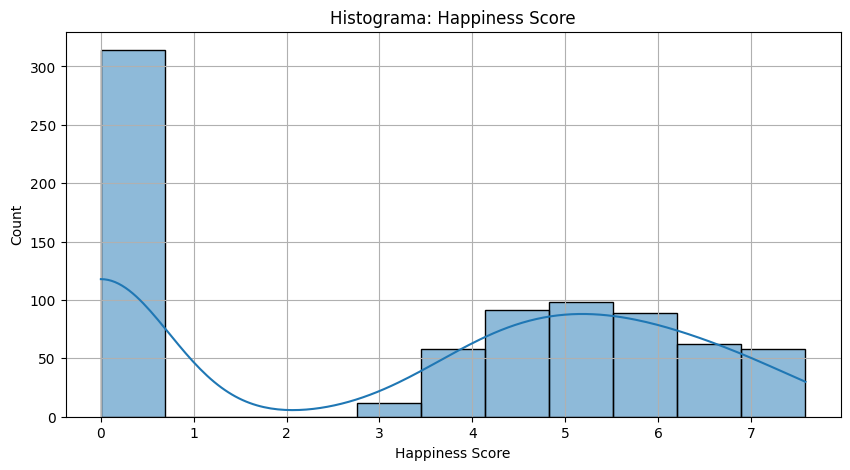

In [43]:
# Visualización 1: Histograma de Happiness Score 
columna = 'Happiness Score'
titulo = 'Histograma: Happiness Score'
plt.figure(figsize=(10, 5))
sns.histplot(df,x=columna,multiple='stack',kde=True)
plt.title(titulo)
plt.grid(True)
plt.show()

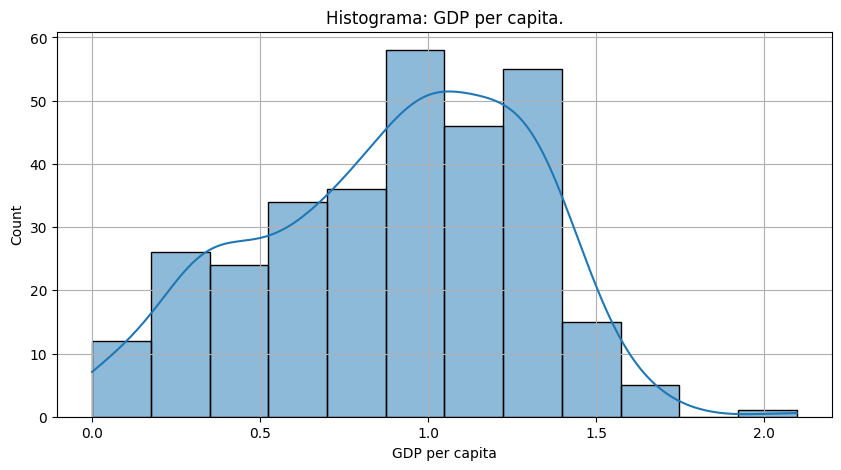

In [44]:
# Visualización 2: Histograma de GDP per capita 
columna = 'GDP per capita'
titulo = 'Histograma: GDP per capita.'
# Crear un nuevo DataFrame sin los registros donde 'GDP per capita' es nulo
df_sin_gdp_nulos = df.dropna(subset=['GDP per capita'])
plt.figure(figsize=(10, 5))
sns.histplot(df_sin_gdp_nulos,x=columna,multiple='stack',kde=True)
plt.title(titulo)
plt.grid(True)
plt.show()

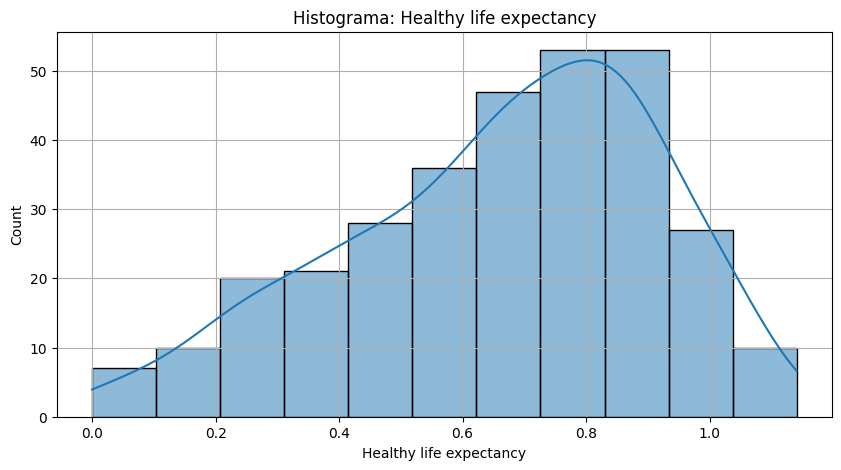

In [45]:
# Visualización 3: Healthy life expectancy
columna = 'Healthy life expectancy'
titulo = 'Histograma: Healthy life expectancy'
plt.figure(figsize=(10, 5))
sns.histplot(df,x=columna,multiple='stack',kde=True)
plt.title(titulo)
plt.grid(True)
plt.show()

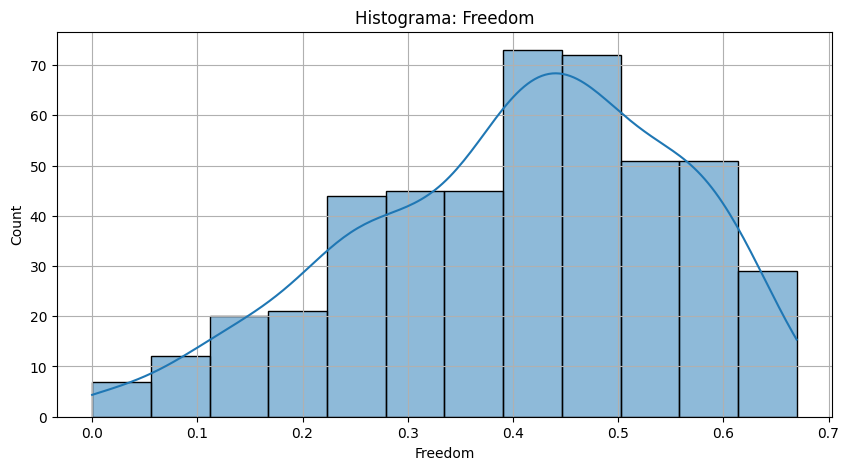

In [46]:
# Visualización 4: Freedom
columna = 'Freedom'
titulo = 'Histograma: Freedom'
plt.figure(figsize=(10, 5))
sns.histplot(df,x=columna,multiple='stack',kde=True)
plt.title(titulo)
plt.grid(True)
plt.show()

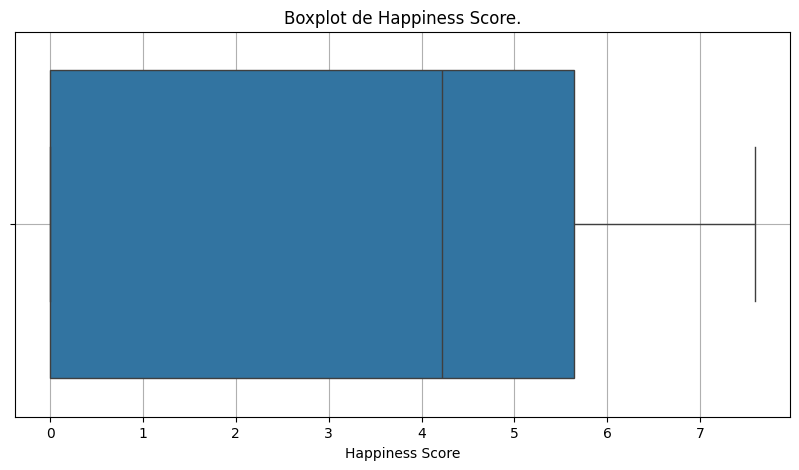

In [47]:
# Visualización 5: Boxplot (Diagrama de Caja) de Score
columna = 'Happiness Score'
titulo = 'Boxplots Happiness Score'
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x=columna)
plt.title('Boxplot de Happiness Score.')
plt.xlabel('Happiness Score')
plt.grid(True)
plt.show()

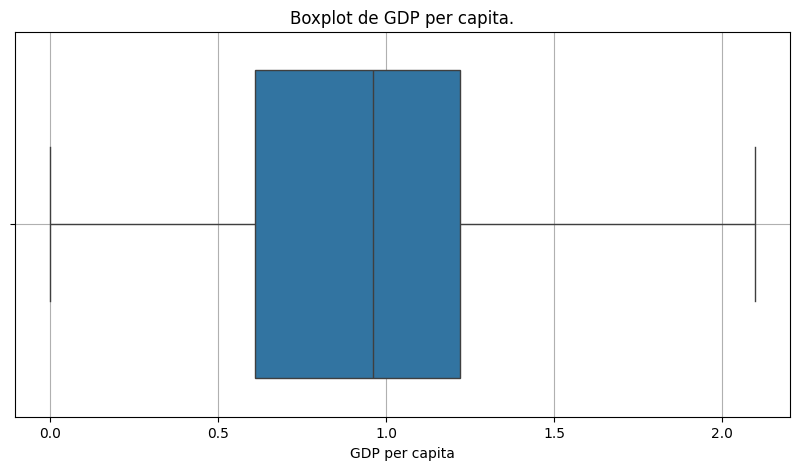

In [48]:
# Visualización 6: Boxplot (Diagrama de Caja) de GDP per capita
columna = 'GDP per capita'
titulo = 'Boxplots GDP per capita'
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x=columna)
plt.title('Boxplot de GDP per capita.')
plt.xlabel('GDP per capita')
plt.grid(True)
plt.show()

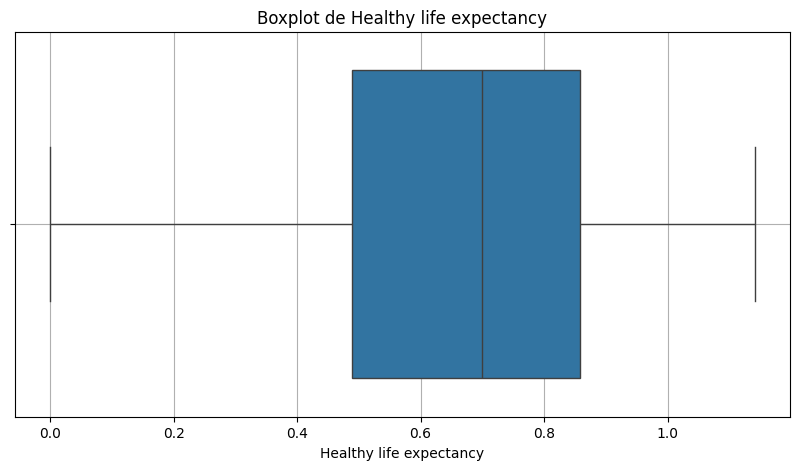

In [49]:
# Visualización 7: Boxplot (Diagrama de Caja) de Healthy life expectancy
columna = 'Healthy life expectancy'
titulo = 'Boxplots Healthy life expectancy'
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x=columna)
plt.title('Boxplot de Healthy life expectancy')
plt.xlabel('Healthy life expectancy')
plt.grid(True)
plt.show()

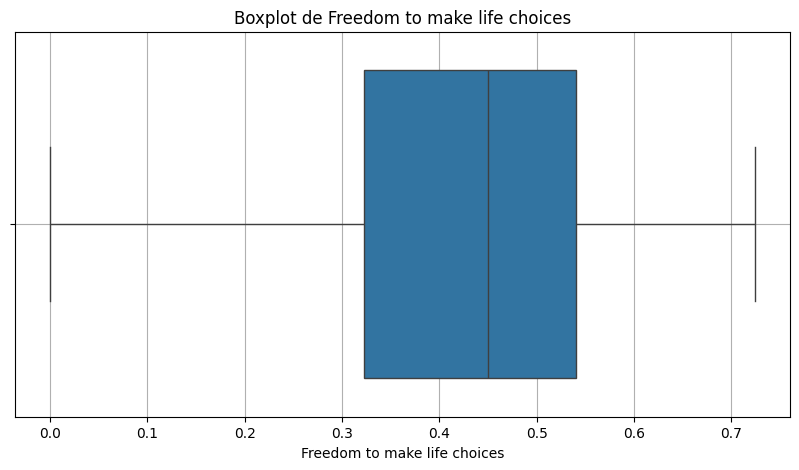

In [50]:
# Visualización 8: Boxplot (Diagrama de Caja) de Freedom to make life choices
columna = 'Freedom to make life choices'
titulo = 'Boxplots Freedom to make life choices'
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x=columna)
plt.title('Boxplot de Freedom to make life choices')
plt.xlabel('Freedom to make life choices')
plt.grid(True)
plt.show()

# 4. Análisis Combinado:
* Combina los histogramas y los boxplots en una sola figura para cada variable.
* Interpreta los resultados y escribe un análisis sobre la distribución de cada variable y la presencia de valores atípicos.

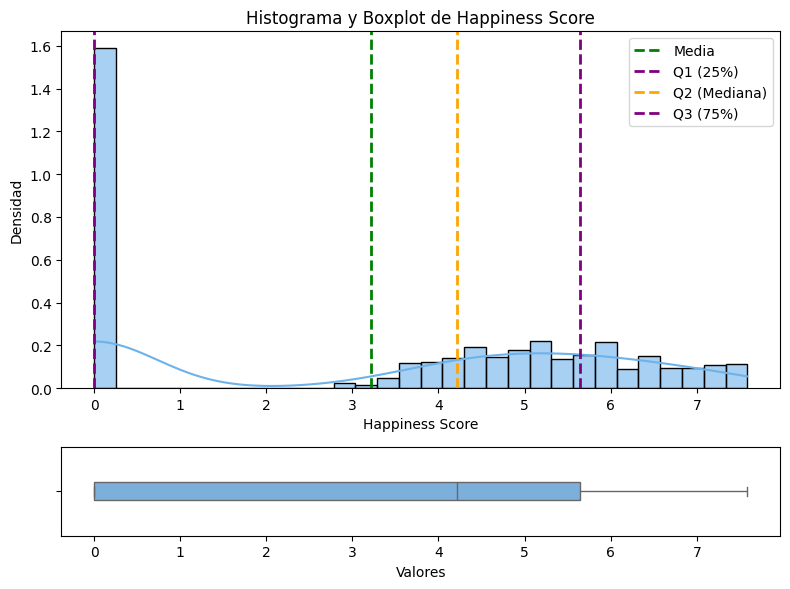

El promedio 3.2157308184143223
Primer interquartil 0.0
Mediana 4.21725
Tercer interquartil 5.641875
Límite inferior (bigote inferior): -8.4628125
Límite superior (bigote superior): 14.1046875


In [51]:
# Visualización 9: Boxplot Happiness Score
columna = 'Happiness Score'

# Crear una figura con subplots: uno para el histograma y otro para el boxplot
fig, (ax_hist, ax_box) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 6))

# Histograma con la curva de densidad
sns.histplot(df[columna].dropna(), bins=30, kde=True, ax=ax_hist, color='#6cb2eb', stat='density', alpha=0.6)
ax_hist.set_title(f'Histograma y Boxplot de {columna}')
ax_hist.set_ylabel('Densidad')

# Calcular y añadir líneas verticales para la media y los cuartiles
media = df[columna].mean()
q1 = df[columna].quantile(0.25)
q2 = df[columna].quantile(0.5)  # También es la mediana
q3 = df[columna].quantile(0.75)

# Añadir líneas para la media y los cuartiles
ax_hist.axvline(media, color='green', linestyle='--', linewidth=2, label='Media')
ax_hist.axvline(q1, color='purple', linestyle='--', linewidth=2, label='Q1 (25%)')
ax_hist.axvline(q2, color='orange', linestyle='--', linewidth=2, label='Q2 (Mediana)')
ax_hist.axvline(q3, color='purple', linestyle='--', linewidth=2, label='Q3 (75%)')

# Añadir leyenda
ax_hist.legend()

# Boxplot horizontal
sns.boxplot(x=df[columna].dropna(), ax=ax_box, color='#6cb2eb', orient='h', width=0.2)
ax_box.set_xlabel('Valores')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()
print(f'El promedio {media}')
print(f'Primer interquartil {q1}')
print(f'Mediana {q2}')
print(f'Tercer interquartil {q3}')
imprimir_bigotes(df[columna].dropna())


El histograma muestra que la mayoria de los países tienen un puntaje de felicidad etre 4.4 y 6.2
El boxplot muestra un SESGO y valor atipico a la izquierda. Hay paises que lo tienen como cero y/o extremadamente bajos.

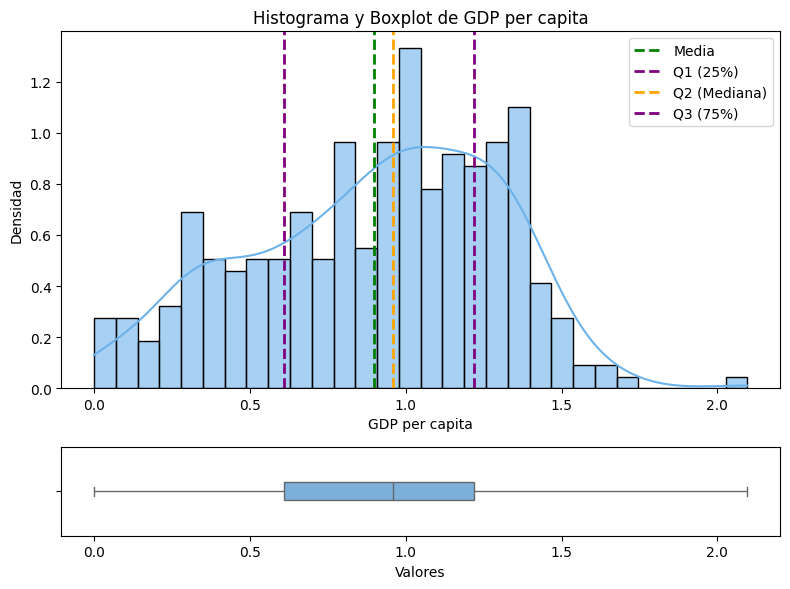

El promedio 0.898298076923077
Primer interquartil 0.6094999999999999
Mediana 0.96
Tercer interquartil 1.2195
Límite inferior (bigote inferior): -0.3055000000000002
Límite superior (bigote superior): 2.1345


In [52]:
# Visualización 10: Histograma y Boxplot de GDP per capita
columna = 'GDP per capita'

# Crear una figura con subplots: uno para el histograma y otro para el boxplot
fig, (ax_hist, ax_box) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 6))

# Histograma con la curva de densidad
sns.histplot(df[columna].dropna(), bins=30, kde=True, ax=ax_hist, color='#6cb2eb', stat='density', alpha=0.6)
ax_hist.set_title(f'Histograma y Boxplot de {columna}')
ax_hist.set_ylabel('Densidad')

# Calcular y añadir líneas verticales para la media y los cuartiles
media = df[columna].mean()
q1 = df[columna].quantile(0.25)
q2 = df[columna].quantile(0.5)  # También es la mediana
q3 = df[columna].quantile(0.75)

# Añadir líneas para la media y los cuartiles
ax_hist.axvline(media, color='green', linestyle='--', linewidth=2, label='Media')
ax_hist.axvline(q1, color='purple', linestyle='--', linewidth=2, label='Q1 (25%)')
ax_hist.axvline(q2, color='orange', linestyle='--', linewidth=2, label='Q2 (Mediana)')
ax_hist.axvline(q3, color='purple', linestyle='--', linewidth=2, label='Q3 (75%)')

# Añadir leyenda
ax_hist.legend()

# Boxplot horizontal
sns.boxplot(x=df[columna].dropna(), ax=ax_box, color='#6cb2eb', orient='h', width=0.2)
ax_box.set_xlabel('Valores')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()
print(f'El promedio {media}')
print(f'Primer interquartil {q1}')
print(f'Mediana {q2}')
print(f'Tercer interquartil {q3}')
imprimir_bigotes(df[columna].dropna())

El histograma muestra un sesgo hacia la izquierda debido a que la mayoria tiene un PIB Bajo y los que tienen alto son muy pocos.

El boxplot muestra algunos paises con PIB muy altos. Tiene un SESGO A la derecha. No se observan valores atipicos u outliers.

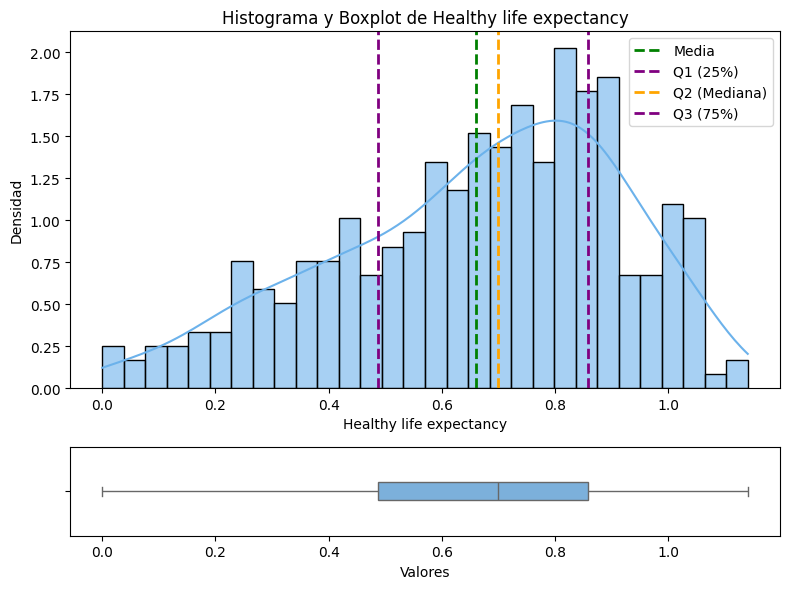

El promedio 0.6612948717948718
Primer interquartil 0.48824999999999996
Mediana 0.699
Tercer interquartil 0.858
Límite inferior (bigote inferior): -0.06637500000000007
Límite superior (bigote superior): 1.412625


In [53]:
# Visualización 11: Histograma y Boxplot de Healthy life expectancy
columna = 'Healthy life expectancy'

# Crear una figura con subplots: uno para el histograma y otro para el boxplot
fig, (ax_hist, ax_box) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 6))

# Histograma con la curva de densidad
sns.histplot(df[columna].dropna(), bins=30, kde=True, ax=ax_hist, color='#6cb2eb', stat='density', alpha=0.6)
ax_hist.set_title(f'Histograma y Boxplot de {columna}')
ax_hist.set_ylabel('Densidad')

# Calcular y añadir líneas verticales para la media y los cuartiles
media = df[columna].mean()
q1 = df[columna].quantile(0.25)
q2 = df[columna].quantile(0.5)  # También es la mediana
q3 = df[columna].quantile(0.75)

# Añadir líneas para la media y los cuartiles
ax_hist.axvline(media, color='green', linestyle='--', linewidth=2, label='Media')
ax_hist.axvline(q1, color='purple', linestyle='--', linewidth=2, label='Q1 (25%)')
ax_hist.axvline(q2, color='orange', linestyle='--', linewidth=2, label='Q2 (Mediana)')
ax_hist.axvline(q3, color='purple', linestyle='--', linewidth=2, label='Q3 (75%)')

# Añadir leyenda
ax_hist.legend()

# Boxplot horizontal
sns.boxplot(x=df[columna].dropna(), ax=ax_box, color='#6cb2eb', orient='h', width=0.2)
ax_box.set_xlabel('Valores')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()
print(f'El promedio {media}')
print(f'Primer interquartil {q1}')
print(f'Mediana {q2}')
print(f'Tercer interquartil {q3}')
imprimir_bigotes(df[columna].dropna())

El histograma muestra una distribución relativamente simétrica con un pico alrededor de los 66 años.

El boxplot muestra total ausencia de valores atípicos en ambos extremos, lo que indica estabilidad en la expectativa de vida saludable entre diferentes países.

Tiene el sesgo a la izquierda. Hay varios paises con expectativas muy bajas de vida.

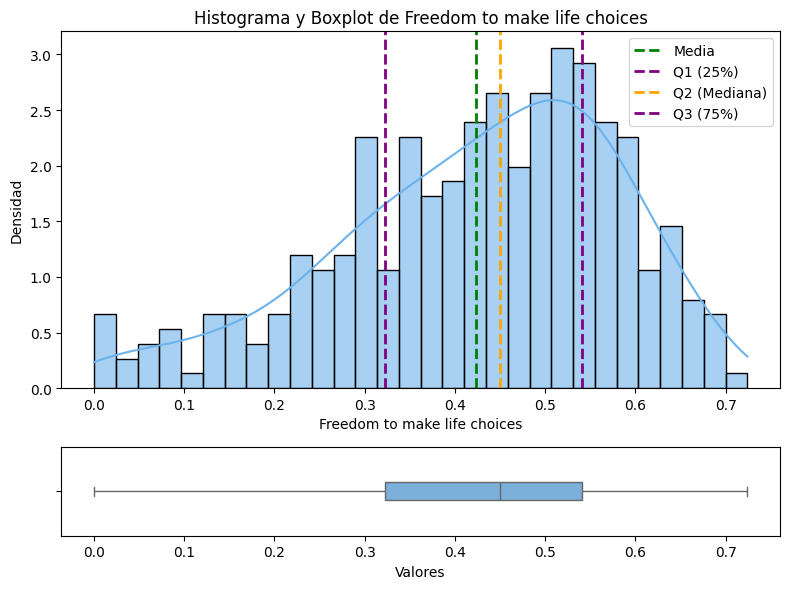

El promedio 0.42353846153846153
Primer interquartil 0.3225
Mediana 0.4495
Tercer interquartil 0.54025
Límite inferior (bigote inferior): -0.00412499999999999
Límite superior (bigote superior): 0.8668750000000001


In [54]:
# Visualización 12: Histograma y Boxplot de Freedom to make life choices
columna = 'Freedom to make life choices'


# Crear una figura con subplots: uno para el histograma y otro para el boxplot
fig, (ax_hist, ax_box) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 6))

# Histograma con la curva de densidad
sns.histplot(df[columna].dropna(), bins=30, kde=True, ax=ax_hist, color='#6cb2eb', stat='density', alpha=0.6)
ax_hist.set_title(f'Histograma y Boxplot de {columna}')
ax_hist.set_ylabel('Densidad')

# Calcular y añadir líneas verticales para la media y los cuartiles
media = df[columna].mean()
q1 = df[columna].quantile(0.25)
q2 = df[columna].quantile(0.5)  # También es la mediana
q3 = df[columna].quantile(0.75)

# Añadir líneas para la media y los cuartiles
ax_hist.axvline(media, color='green', linestyle='--', linewidth=2, label='Media')
ax_hist.axvline(q1, color='purple', linestyle='--', linewidth=2, label='Q1 (25%)')
ax_hist.axvline(q2, color='orange', linestyle='--', linewidth=2, label='Q2 (Mediana)')
ax_hist.axvline(q3, color='purple', linestyle='--', linewidth=2, label='Q3 (75%)')

# Añadir leyenda
ax_hist.legend()

# Boxplot horizontal
sns.boxplot(x=df[columna].dropna(), ax=ax_box, color='#6cb2eb', orient='h', width=0.2)
ax_box.set_xlabel('Valores')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()
print(f'El promedio {media}')
print(f'Primer interquartil {q1}')
print(f'Mediana {q2}')
print(f'Tercer interquartil {q3}')
imprimir_bigotes(df[columna].dropna())

El histograma muestra una distribución sesgada hacia la izquierda, al contrario a la del PIB per cápita. Menos libertad menos riquezas, pues en el de PIB el Sesgo está a la derecha

El boxplot revela ausencia de valores atípicos, indicando que en algunos países la libertad para tomar decisiones de vida es significativamente estable con el de la mayoría.